## Korelasyon Analizi

degişkenler arasındaki ilişki,bu ,ilişkinin yönü ve şiddeti ile ilgili bilgiler saglayan istatistiksel bir yöntemdir 

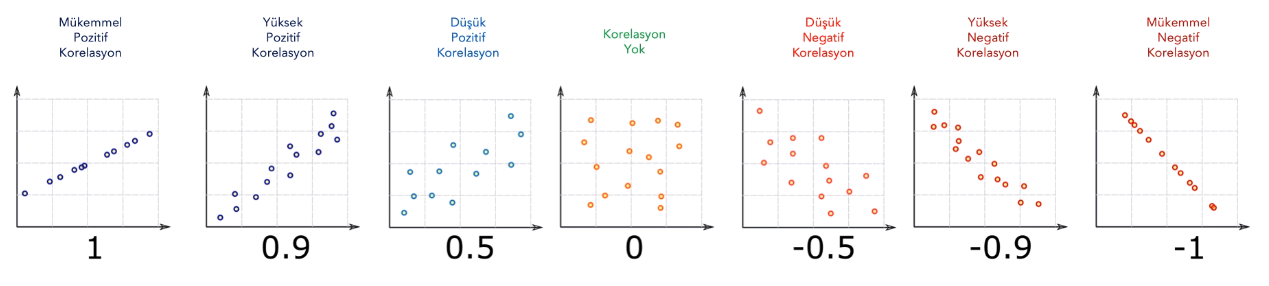

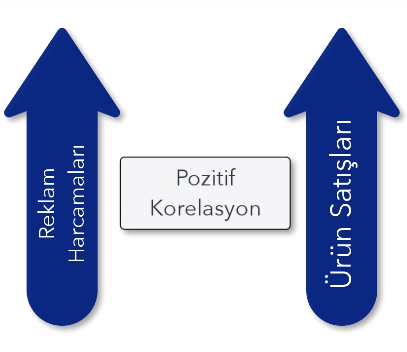

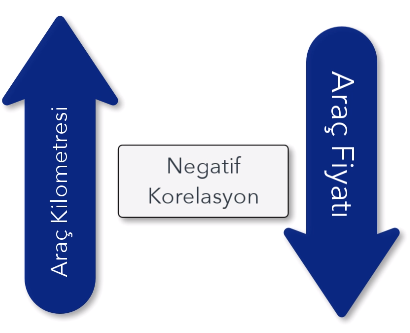

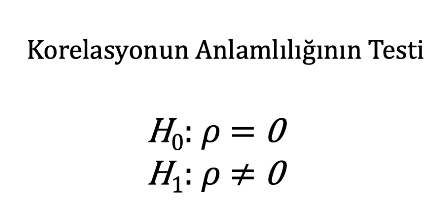

test istatistigi

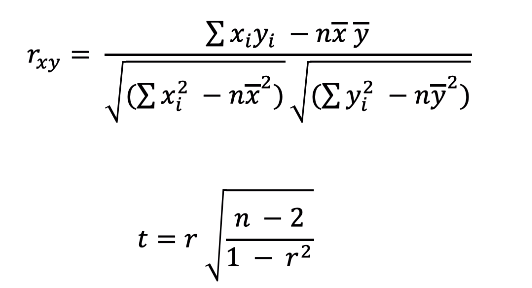

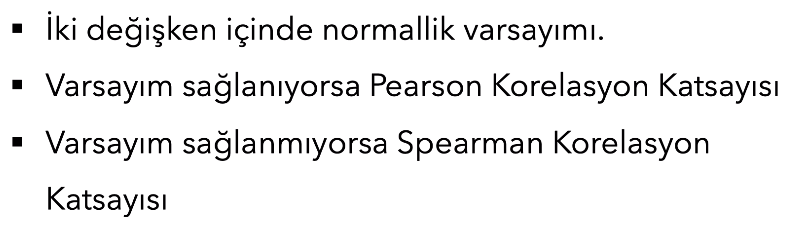

### İŞ Uygulaması :Bahşiş ile Hesap arasındaki İlişkinin İncelenmesi

bahşiş ile ödenen hesap arasında korelasyon var mı ?

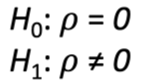

Bahşiş veri seti:

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)!!burası önemli nokta

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [2]:
import seaborn as sns 
tips =sns.load_dataset('tips')
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df["total_bill"]=df["total_bill"]-df["tip"]#burada dikkat edilmesi gereken durumu düzelttik 


In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


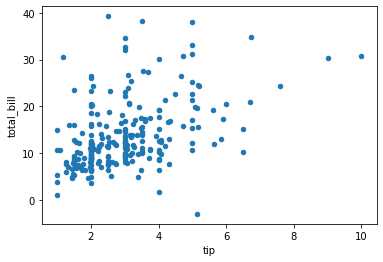

In [6]:
df.plot.scatter("tip","total_bill");

### Korelasyon Varsayım Kontrolü

In [7]:
from scipy.stats import shapiro

In [9]:
test_istatistigi,pvalue=shapiro(df["tip"])
print('Test İstatistigi=%.4f,p-degeri=%.4f'%(test_istatistigi,pvalue))

test_istatistigi,pvalue=shapiro(df["total_bill"])
print('Test İstatistigi=%.4f,p-degeri=%.4f'%(test_istatistigi,pvalue))

Test İstatistigi=0.8978,p-degeri=0.0000
Test İstatistigi=0.9073,p-degeri=0.0000


burada Ho reddedilmiş anlamına gelir 

normallik degeri saglanmıyor

### Hipotez Testi - Korelasyon Katsayısı- Korelasyonun Anlamlılıgının Testi

In [11]:
#Korelasyon Katsayısı

In [12]:
df["tip"].corr(df["total_bill"])

0.44362654305917865

In [14]:
df["tip"].corr(df["total_bill"],method="spearman")#ilgili katsayıyı aldık

0.47840852330002187

pozitif bir korelasyon var 

In [13]:
# Korelasyonun Anlamlılıgının Testi

In [15]:
from scipy.stats.stats import pearsonr

In [19]:
test_istatistigi,pvalue=pearsonr(df["tip"],df["total_bill"])

print('test istatistigi =%.4f, p-degeri=%.4f' %(test_istatistigi,pvalue))

test istatistigi =0.4436, p-degeri=0.0000


degişkenler anlamlı bir ilişki ve korelasyon ilişkisi var demektir 

### Nonparametrik Hipotez Testi

In [22]:
from scipy.stats import stats
stats.spearmanr(df["tip"],df["total_bill"])

SpearmanrResult(correlation=0.47840852330002187, pvalue=2.3232643717153163e-15)

In [25]:
test_istatistigi,pvalue=stats.spearmanr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı =%.4f, p-degeri=%.4f' %(test_istatistigi,pvalue))

Korelasyon Katsayısı =0.4784, p-degeri=0.0000


sonuç=>ilişkili anlamlı -pozitif-orta şiddete sahiptir

In [26]:
test_istatistigi,pvalue=stats.kendalltau(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı =%.4f, p-degeri=%.4f' %(test_istatistigi,pvalue))

Korelasyon Katsayısı =0.3449, p-degeri=0.0000


kendalltau=> biraz daha temkinli katsayıdır 